

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 


## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [2]:
import numpy as np

**1.** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [34]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
x2 = np.array([6, 2, 3, 5, 7])

def max_element(arr):
    zero_ind = np.argwhere(arr[:-1] == 0) + 1
    if (arr[zero_ind].size == 0):
        return None
    else:
        return np.max(arr[zero_ind])

In [35]:
print(max_element(x))
print(max_element(x2))

5
None


**2.** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [41]:
def nearest_value(X, v):
    nearest_idx = np.argmin(np.abs(X-v))
    return X.flat[nearest_idx]

X = np.arange(0,10).reshape((2, 5))
v = 3.6
nearest_value(X, v)

4

**3.** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [54]:
def scale(X):
    X_means = np.mean(X, axis = 0)
    diff = X-X_means
    std = np.std(diff, axis = 0)
    std[std == 0] = 0.01
    return diff / std
    
matrix = np.random.randint(10, 100, size = (5,5))
print(matrix)
scale(matrix)

[[58 78 20 67 43]
 [49 53 84 17 41]
 [77 67 91 65 72]
 [40 63 73 80 92]
 [87 22 18 94 49]]


array([[-0.24098166,  1.12252859, -1.17276073,  0.09240069, -0.83318534],
       [-0.75737094, -0.18883659,  0.84489214, -1.83261362, -0.93479331],
       [ 0.84917348,  0.54552791,  1.06557292,  0.01540011,  0.6401302 ],
       [-1.27376022,  0.33570949,  0.49810805,  0.59290441,  1.65620988],
       [ 1.42293935, -1.8149294 , -1.23581238,  1.13190841, -0.52836144]])

**4.** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [83]:
normal_matrix = np.random.normal(10, 1, size = (5,5))

def get_stats(X):
    print('Определитель:',np.linalg.det(X))
    print('След:',np.trace(X))
    print('Наименьший элемент:',np.min(X))
    print('Наибольший элемент:',np.max(X))
    print('Норма Форбениуса:',np.linalg.norm(X))
    print('Собственные числа:',np.linalg.eigvals(X))
    print('Обратная матрица:',np.linalg.inv(X))
    return None

   
get_stats(normal_matrix)

Определитель: -593.4679192564922
След: 50.6761448148296
Наименьший элемент: 7.586496998826212
Наибольший элемент: 12.056355523198294
Норма Форбениуса: 50.15904878263695
Собственные числа: [49.72468236+0.j         -2.01168133+0.j         -0.43562194+1.16512553j
 -0.43562194-1.16512553j  3.83438766+0.j        ]
Обратная матрица: [[-0.19671691  0.4050731   0.41527841 -0.4072238  -0.21113179]
 [ 0.31675003 -0.19568977  0.15600014 -0.35222148  0.06142822]
 [-0.62819644 -0.10405764 -0.23857406  0.85376066  0.18516733]
 [ 0.67526284  0.01865825  0.03347531 -0.42333266 -0.29710345]
 [-0.16226585 -0.07104846 -0.32209999  0.312559    0.27504585]]


**5.** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [92]:
mat_1 = np.random.normal(10, 1, size = (10, 10))
mat_2 = np.random.normal(10, 1, size = (10, 10))
mat_mul_max = []

for exp_num in range(100):
    mat_mul = mat_1 @ mat_2
    mat_mul_max.append(np.max(mat_mul))
print(np.mean(mat_mul_max))
print(np.quantile(mat_mul_max, 0.95))

1091.5850881394417
1091.5850881394413


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [4]:
import pandas as pd
%matplotlib inline
df = pd.read_csv('2008.csv')
df.head(20)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,2008,1,3,4,1349.0,1325,1640.0,1609,B6,834,...,5.0,13.0,0,NaN,0,13.0,0.0,7.0,0.0,11.0
6,2008,3,31,1,1359.0,1400,1413.0,1415,WN,1589,...,5.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,2008,4,22,2,1815.0,1820,2057.0,2131,DL,617,...,9.0,31.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,3,4,2,626.0,630,820.0,830,WN,454,...,4.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,10,6,1,1905.0,1907,24.0,37,UA,270,...,6.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


**6.** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [2]:
df.CancellationCode.mode()

0    A
dtype: object

**Ответ:** CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
Наиболее частой причиной отмены рейсов является перевозчик (A - carrier).

**7.** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [3]:
print('Среденее расстояние полета:', df.Distance.mean())
print('Минимальное расстояние полета:', df.Distance.min())
print('Максимальное расстояние полета:', df.Distance.max())

Среденее расстояние полета: 724.5082571428571
Минимальное расстояние полета: 31
Максимальное расстояние полета: 4962


**8.** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [4]:
df[df.Distance == 31][['FlightNum', 'DayOfWeek', 'DayofMonth', 'Month', 'Year']]

,FlightNum,DayOfWeek,DayofMonth,Month,Year
1116,65,2,30,12,2008
6958,65,5,26,12,2008
17349,64,1,18,8,2008
27534,64,2,11,3,2008
46082,65,6,9,8,2008
48112,64,4,28,2,2008


**Ответ:** Минимальное расстояние было на рейсах под номерами 64 и 65.
В другие дни эти рейсы имели следующую продолжительность:

In [5]:
print(pd.unique(df.loc[df.FlightNum.isin([64,65])].Distance))

[ 533   31  680 2381   82 1005  123  359 1747  571  372 2454  581  883
  281  682  414  386]


**9.** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               70000 non-null  int64  
 1   Month              70000 non-null  int64  
 2   DayofMonth         70000 non-null  int64  
 3   DayOfWeek          70000 non-null  int64  
 4   DepTime            68601 non-null  float64
 5   CRSDepTime         70000 non-null  int64  
 6   ArrTime            68444 non-null  float64
 7   CRSArrTime         70000 non-null  int64  
 8   UniqueCarrier      70000 non-null  object 
 9   FlightNum          70000 non-null  int64  
 10  TailNum            69180 non-null  object 
 11  ActualElapsedTime  68418 non-null  float64
 12  CRSElapsedTime     69991 non-null  float64
 13  AirTime            68418 non-null  float64
 14  ArrDelay           68418 non-null  float64
 15  DepDelay           68601 non-null  float64
 16  Origin             700

In [8]:
df.Origin.mode()

0    ATL
dtype: object

**Ответ:** Больше всего вылетов было осуществлено из аэропорта "ATL", находящегося в городе Атланта.

**10.** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [9]:
origin_mean_air_time = df.groupby('Origin')['AirTime'].mean()
print(origin_mean_air_time.to_string())
# origin_mean_air_time

Origin
ABE     88.266667
ABI     36.400000
ABQ     93.454321
ABY     35.714286
ACK     50.800000
ACT     28.521739
ACV     55.606061
ACY    113.500000
ADK    142.000000
ADQ     42.666667
AEX     69.314286
AGS     35.000000
AKN     48.000000
ALB    102.347826
ALO     34.666667
AMA     56.474359
ANC    165.415094
ASE     46.234043
ATL     93.010084
ATW     56.571429
AUS    102.662921
AVL     75.487805
AVP     96.413793
AZO     34.703704
BDL    115.602837
BET     56.583333
BFL     57.040816
BGM     67.888889
BGR     84.176471
BHM     79.177215
BIL     71.190476
BIS     68.230769
BLI     94.000000
BMI     61.725806
BNA     98.032136
BOI     80.515528
BOS    137.755989
BQK     42.666667
BQN    193.954545
BRO     60.555556
BRW     96.625000
BTM     54.153846
BTR     61.470588
BTV     89.261538
BUF     96.952941
BUR     77.050847
BWI    105.667650
BZN     86.674419
CAE     76.080808
CAK     86.086957
CDC     53.500000
CDV     36.375000
CEC     46.916667
CHA     62.065217
CHO     70.250000
CHS

In [10]:
origin_mean_air_time[origin_mean_air_time==origin_mean_air_time.max()]

Origin
SJU    205.2
Name: AirTime, dtype: float64

**11.** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [11]:
origin_grouped = df.groupby('Origin')
df_filtered = origin_grouped.filter(lambda x: x['Origin'].count() < 1000)
df_dep_delay = df_filtered[df_filtered.DepDelay > 0]
df_dep_delay.groupby('Origin').count().sort_values('FlightNum')


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Origin,,,,,,,,,,,,,,,,,,,,,
GST,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,0,0,0,0,0
ERI,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,0,0,0,0,0
BRO,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,0,0,0,0,0
RFD,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,0,0,0,0,0
CDC,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IAD,322,322,322,322,322,322,322,322,322,322,...,322,322,322,0,322,169,169,169,169,169
DAL,329,329,329,329,329,329,327,329,329,329,...,327,329,329,0,329,109,109,109,109,109
MIA,332,332,332,332,332,332,330,332,332,332,...,330,332,332,0,332,182,182,182,182,182


**Ответ:** В аэропорте 'MDW' наибольшее число задержанных вылетов.

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12.** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [63]:
df = pd.read_csv('2008.csv')
print('Всего пропущенных элементов в таблице:', df.isna().sum().sum())
print('Хотя бы один пропуск имеют', (df.isna().sum(axis=1) > 0).sum(), 'объектов')
print('Хотя бы один пропуск имеют', (df.isna().sum(axis=0) > 0).sum(), 'признаков')

Всего пропущенных элементов в таблице: 355215
Хотя бы один пропуск имеют 70000 объектов
Хотя бы один пропуск имеют 16 признаков


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [40]:
print('Имеются ли пропущенные значения в целевой переменной:', df.DepDelay.hasnans)

Имеются ли пропущенные значения в целевой переменной: True


In [41]:
pd.set_option('display.max_columns', None)
df[df.DepDelay.isna()].head(20)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,NaN,NaN,155.0,NaN,NaN,NaN,DFW,MIA,1121,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,N683BR,NaN,100.0,NaN,NaN,NaN,ATL,CAK,528,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,N990AT,NaN,85.0,NaN,NaN,NaN,BOS,BWI,370,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,N526US,NaN,98.0,NaN,NaN,NaN,MDW,MSP,349,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,NaN,NaN,87.0,NaN,NaN,NaN,DSM,ORD,299,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
194,2008,1,28,1,NaN,1640,NaN,1719,UA,753,NaN,NaN,99.0,NaN,NaN,NaN,CLE,ORD,316,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
204,2008,6,13,5,NaN,1229,NaN,1421,OH,5765,N528CA,NaN,112.0,NaN,NaN,NaN,LGA,RDU,431,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
236,2008,7,19,6,NaN,544,NaN,917,OO,6151,N728SK,NaN,153.0,NaN,NaN,NaN,EUG,DEN,997,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
257,2008,4,19,6,NaN,1345,NaN,1435,AA,1853,NaN,NaN,110.0,NaN,NaN,NaN,DFW,COS,592,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
267,2008,9,23,2,NaN,1400,NaN,1515,WN,2049,NaN,NaN,75.0,NaN,NaN,NaN,OAK,ONT,361,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [42]:
df[df.DepDelay.isna()].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,1399.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,1399.0,5.646891,3.705114,1.0,2.0,5.0,9.0,12.0
DayofMonth,1399.0,15.562545,8.585107,1.0,9.0,15.0,22.0,31.0
DayOfWeek,1399.0,3.987848,2.018653,1.0,2.0,4.0,6.0,7.0
DepTime,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRSDepTime,1399.0,1379.989993,462.847110,50.0,1000.0,1420.0,1755.0,2359.0
ArrTime,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRSArrTime,1399.0,1543.809149,480.819451,2.0,1145.0,1605.0,1940.0,2359.0
FlightNum,1399.0,2789.937098,2131.389377,5.0,895.0,2309.0,4444.0,7794.0
ActualElapsedTime,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Ответ:** Исходя из результатов напрашиваются очевидные выводы: все рейсы, в которых пропущено значение в столбце DepDelay, были отменены. При этом отмена была по разным причинам. Какой-то связи с присутствующими показателями не наблюдается. Однако очевидно, что если по рейсу нет информации о задержке и данные рейсы были отменены, по этим рейсам нет информации, связанной с перелетом. Это: DepTime, ArrTime, ActualElapsedTime, AirTime, ArrDelay, TaxiIn, TaxiOut, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay.

Данные показатели отсутствуют, если не указан DepDelay. Однако не вижу пока причин удалять какие бы то ни было показатели.

In [64]:
df_filtered = df[~df.DepDelay.isna() & df.DepDelay != 0 ]

**13.** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [65]:
df_filtered = df_filtered.assign(DepTime_Hour = lambda x: df_filtered.DepTime.astype("Int64") // 100 if not df_filtered.DepTime.empty else None )
df_filtered = df_filtered.assign(DepTime_Minute = lambda x: df_filtered.DepTime.astype("Int64") % 100 if not df_filtered.DepTime.empty else None )

df_filtered = df_filtered.assign(CRSDepTime_Hour = lambda x: df_filtered.CRSDepTime.astype("Int64") // 100 if not df_filtered.CRSDepTime.empty else None )
df_filtered = df_filtered.assign(CRSDepTime_Minute = lambda x: df_filtered.CRSDepTime.astype("Int64") % 100 if not df_filtered.CRSDepTime.empty else None )

df_filtered = df_filtered.assign(ArrTime_Hour = lambda x: df_filtered.ArrTime.astype("Int64") // 100 if not df_filtered.ArrTime.empty else None )
df_filtered = df_filtered.assign(ArrTime_Minute = lambda x: df_filtered.ArrTime.astype("Int64") % 100 if not df_filtered.ArrTime.empty else None )

df_filtered = df_filtered.assign(CRSArrTime_Hour = lambda x: df_filtered.CRSArrTime.astype("Int64") // 100 if not df_filtered.CRSArrTime.empty else None )
df_filtered = df_filtered.assign(CRSArrTime_Minute = lambda x: df_filtered.CRSArrTime.astype("Int64") % 100 if not df_filtered.CRSArrTime.empty else None )

df_filtered = df_filtered.drop(columns=['DepTime', 'CRSDepTime', 'ArrTime' , 'CRSArrTime'])
df_filtered

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21,11,20,55,23,8,23,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14,26,14,10,17,30,17,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11,43,11,45,15,1,15,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11,41,11,44,13,23,13,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8,15,8,20,12,43,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,OH,5218,N655CA,110.0,113.0,85.0,...,NaN,NaN,9,20,9,25,11,10,11,18
69995,2008,5,12,1,DL,794,N988DL,128.0,129.0,86.0,...,NaN,NaN,18,29,18,40,21,37,21,49
69996,2008,5,11,7,OO,6159,N776SK,47.0,49.0,30.0,...,0.0,22.0,11,49,11,25,13,36,13,14
69998,2008,2,18,1,NW,641,N318US,234.0,219.0,192.0,...,0.0,6.0,19,6,19,0,22,0,21,39


**14.** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему 
смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [66]:
df_filtered.corr().DepDelay.sort_values()

Month               -0.029528
DepTime_Minute      -0.017055
Cancelled           -0.001123
ArrTime_Minute       0.006171
DayOfWeek            0.008530
DayofMonth           0.008574
CRSArrTime_Minute    0.008609
SecurityDelay        0.010668
TaxiIn               0.020640
FlightNum            0.021166
CRSDepTime_Minute    0.022437
Distance             0.024252
AirTime              0.025237
Diverted             0.027166
CRSElapsedTime       0.034302
ActualElapsedTime    0.041946
ArrTime_Hour         0.070181
TaxiOut              0.101294
CRSArrTime_Hour      0.135561
CRSDepTime_Hour      0.140084
NASDelay             0.171591
DepTime_Hour         0.203125
WeatherDelay         0.238872
CarrierDelay         0.532696
LateAircraftDelay    0.553806
ArrDelay             0.933526
DepDelay             1.000000
Year                      NaN
Name: DepDelay, dtype: float64

**Ответ:** Если судить по визуализации корреляции, то наибольшую корреляцию показывает "ArrDelay". Однако по задаче требуется руководтвоваться в тч описанием датасета. По совокупности визуализации корреляции и описанию также исключим показатели "CarrierDelay" и "LateAircraftDelay" с показателем корреляции больше 0.5.
Итого, исключим следующие показатели из датасета: TailNum, Year, ArrDelay, CarrierDelay и LateAircraftDelay.

In [67]:
df_filtered = df_filtered.drop(columns=['TailNum', 'Year', 'ArrDelay', 'CarrierDelay', 'LateAircraftDelay'])
df_filtered

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,...,NASDelay,SecurityDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,6,18,3,WN,242,57.0,65.0,46.0,16.0,MDW,...,NaN,NaN,21,11,20,55,23,8,23,0
1,6,4,3,XE,2380,124.0,138.0,108.0,16.0,IAH,...,NaN,NaN,14,26,14,10,17,30,17,28
2,8,3,7,WN,1769,138.0,155.0,125.0,-2.0,MDW,...,NaN,NaN,11,43,11,45,15,1,15,20
3,1,23,3,OO,3802,102.0,111.0,79.0,-3.0,SLC,...,NaN,NaN,11,41,11,44,13,23,13,35
4,5,4,7,WN,399,148.0,160.0,136.0,-5.0,LAS,...,NaN,NaN,8,15,8,20,12,43,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1,26,6,OH,5218,110.0,113.0,85.0,-5.0,CVG,...,NaN,NaN,9,20,9,25,11,10,11,18
69995,5,12,1,DL,794,128.0,129.0,86.0,-11.0,ORD,...,NaN,NaN,18,29,18,40,21,37,21,49
69996,5,11,7,OO,6159,47.0,49.0,30.0,24.0,ORD,...,0.0,0.0,11,49,11,25,13,36,13,14
69998,2,18,1,NW,641,234.0,219.0,192.0,6.0,RSW,...,15.0,0.0,19,6,19,0,22,0,21,39


**15.** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<AxesSubplot:>

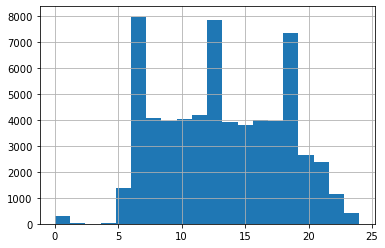

In [68]:
df_filtered['DepTime_Hour'].hist(bins=20)

<AxesSubplot:>

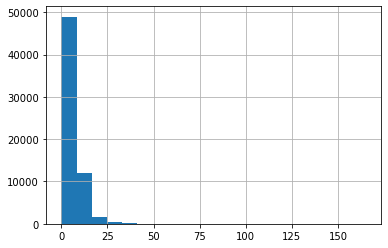

In [69]:
df_filtered['TaxiIn'].hist(bins=20)

<AxesSubplot:>

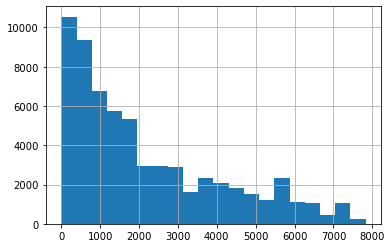

In [70]:
df_filtered['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

**Ответ:** Показатели несоизмеримы, имеют разный порядок. Масштабирование позволит привести их к одному масштабу, что даст возможность использовать их в анализе данных корректным образом.

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [90]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import StandardScaler

def transform_data(data):
    new_data = data.copy()
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
    new_data[numeric_cols] = new_data[numeric_cols].fillna(0)
    new_data[numeric_cols] = StandardScaler().fit_transform(new_data[numeric_cols])
    for column in data.select_dtypes(include=['object']).columns:
        new_data[column].fillna('nan')
    new_data = pd.get_dummies(new_data)
    return new_data

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [93]:
df2 = transform_data(df_filtered)
df2.head(20)

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,...,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM,CancellationCode_A,CancellationCode_B
0,-0.118281,0.256485,-0.462767,-0.991600,-0.988979,-0.916826,-0.849307,0.144971,-0.744130,-0.786908,...,0,0,0,0,0,0,0,0,0,0
1,-0.118281,-1.332050,-0.462767,0.106546,-0.040552,0.127377,0.064301,0.144971,0.183961,-0.582387,...,0,0,0,0,0,0,0,0,0,0
2,0.467662,-1.445517,1.541454,-0.207284,0.157627,0.370547,0.314806,-0.354394,0.471018,-0.582387,...,0,0,0,0,0,0,0,0,0,0
3,-1.583137,0.823819,-0.462767,0.836931,-0.351976,-0.258835,-0.363032,-0.382136,-0.347886,-0.582387,...,0,0,0,0,0,0,0,0,0,0
4,-0.411252,-1.332050,1.541454,-0.910960,0.299183,0.442068,0.476898,-0.437621,0.634799,-0.582387,...,0,0,0,0,0,0,0,0,0,0
5,-1.583137,-1.445517,0.038288,-0.687530,0.624762,0.499285,0.727403,0.366910,0.525612,-0.377866,...,0,0,0,0,0,0,0,0,0,0
6,-0.997195,1.731554,-1.464878,-0.299738,-0.748333,-0.773785,-0.716686,-0.326651,-0.707147,-0.377866,...,0,0,0,0,0,0,0,0,0,0
7,-0.704223,0.710352,-0.963823,-0.798988,3.045375,3.460244,2.923008,-0.437621,2.674134,0.440219,...,0,0,0,0,0,0,0,0,0,0
8,-0.997195,-1.332050,-0.963823,-0.882710,0.667229,0.728151,0.889495,-0.409878,0.603099,-0.582387,...,0,0,0,0,0,0,0,0,0,0
9,1.053604,-1.105117,-1.464878,-0.977219,1.021120,1.157276,1.081058,-0.354394,1.457225,-0.173345,...,0,0,0,0,0,0,0,0,0,0


In [94]:
print('Количество признаков после преобразования:', len(df2.columns))

Количество признаков после преобразования: 640


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [97]:
from sklearn.model_selection import train_test_split
X = df2.drop('DepDelay', axis=1)
Y = df2.DepDelay
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7)

print(f"Выборка в y_train:\n{y_train}")
print(f"Выборка в y_test:\n{y_test}")

Выборка в y_train:
15073    0.200455
43438   -0.326651
52947   -0.465363
22648   -0.271166
1740    -0.354394
           ...   
36089   -0.354394
46827   -0.493106
26222   -0.465363
21960   -0.493106
65018   -0.382136
Name: DepDelay, Length: 44382, dtype: float64
Выборка в y_test:
54305    0.588850
60457   -0.354394
28734   -0.548591
18494   -0.104712
16342   -0.465363
           ...   
43820   -0.326651
33050   -0.326651
20101   -0.271166
1618    -0.520848
49234   -0.409878
Name: DepDelay, Length: 19022, dtype: float64


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17.** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

reg = LinearRegression()
reg.fit(X_train.head(1000), y_train.head(1000))

print('MSE тренировочной выборки:', mean_squared_error(y_train.head(1000), reg.predict(X_train.head(1000))))
print('MSE тестовой выборки:', mean_squared_error(y_test, reg.predict(X_test)))
print('\n')
print('𝑅2 тренировочной выборки:', r2_score(y_train.head(1000), reg.predict(X_train.head(1000))))
print('𝑅2 тестовой выборки:', r2_score(y_test, reg.predict(X_test)))

print(reg.coef_.max())
print(reg.coef_.min())

MSE тренировочной выборки: 0.33007415807752805
MSE тестовой выборки: 5.757548428439393e+22


𝑅2 тренировочной выборки: 0.6410190579321651
𝑅2 тестовой выборки: -5.888421707050088e+22
7321784322.890233
-227626851817.9702


**Ответ:** Веса у полученной модели очень большие, что является признаком нестабильной модели. Это может говорить о переобученности модели. Чтобы нивелировать этот момент, стоит воспользоваться регуляризацией.

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18.** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [127]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import KFold

lasso_cv = LassoCV()
ridge_cv = RidgeCV()

# kf = KFold(n_splits=5)

lasso_cv.fit(X_train.head(1000), y_train.head(1000))
print('Налучший коэффициент регуляризации для L1', lasso_cv.alpha_)

ridge_cv.fit(X_train.head(1000), y_train.head(1000), )
print('Налучший коэффициент регуляризации для L2', ridge_cv.alpha_)

/Users/mckinsey/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11967003884677752, tolerance: 0.07671746012799702
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mckinsey/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.31440577895705246, tolerance: 0.07671746012799702
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mckinsey/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5284163268304383, tolerance: 0.07671746012799702
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mckinsey/opt/anaconda3/lib/pyth

Налучший коэффициент регуляризации для L1 0.033282554252116146
Налучший коэффициент регуляризации для L2 10.0


In [134]:
print('MSE тренировочной выборки:', mean_squared_error(y_train.head(1000), reg.predict(X_train.head(1000))))
print('MSE тестовой выборки:', mean_squared_error(y_test, reg.predict(X_test)))
print('MSE тренировочной выборки с регуляризацией L1:', mean_squared_error(y_train.head(1000), lasso_cv.predict(X_train.head(1000))))
print('MSE тестовой выборки с регуляризацией L1:', mean_squared_error(y_test, lasso_cv.predict(X_test)))
print('MSE тренировочной выборки с регуляризацией L2:', mean_squared_error(y_train.head(1000), ridge_cv.predict(X_train.head(1000))))
print('MSE тестовой выборки с регуляризацией L2:', mean_squared_error(y_test, ridge_cv.predict(X_test)))

print('\n')

print('𝑅2 тренировочной выборки:', r2_score(y_train.head(1000), reg.predict(X_train.head(1000))))
print('𝑅2 тестовой выборки:', r2_score(y_test, reg.predict(X_test)))
print('𝑅2 тренировочной выборки с регуляризацией L1:', r2_score(y_train.head(1000), lasso_cv.predict(X_train.head(1000))))
print('𝑅2 тестовой выборки с регуляризацией L1:', r2_score(y_test, lasso_cv.predict(X_test)))
print('𝑅2 тренировочной выборки с регуляризацией L2:', r2_score(y_train.head(1000), ridge_cv.predict(X_train.head(1000))))
print('𝑅2 тестовой выборки с регуляризацией L2:', r2_score(y_test, ridge_cv.predict(X_test)))

print('\nW-коэффициенты:')

print(lasso_cv.coef_.max())
print(lasso_cv.coef_.min())

print(ridge_cv.coef_.max())
print(ridge_cv.coef_.min())

MSE тренировочной выборки: 0.33007415807752805
MSE тестовой выборки: 5.757548428439393e+22
MSE тренировочной выборки с регуляризацией L1: 0.6249905815168232
MSE тестовой выборки с регуляризацией L1: 0.7799517685481856
MSE тренировочной выборки с регуляризацией L2: 0.4429285563477261
MSE тестовой выборки с регуляризацией L2: 0.818561184468378


𝑅2 тренировочной выборки: 0.6410190579321651
𝑅2 тестовой выборки: -5.888421707050088e+22
𝑅2 тренировочной выборки с регуляризацией L1: 0.3202748465884584
𝑅2 тестовой выборки с регуляризацией L1: 0.20231935841204762
𝑅2 тренировочной выборки с регуляризацией L2: 0.518281251242013
𝑅2 тестовой выборки с регуляризацией L2: 0.16283232228430977

W-коэффициенты:
1.031476138544212
-0.8008275427678602
1.7414559951671318
-1.464062943457008


**Ответ:** применение регуляризации значительно улучшило показатели модели. Можем предположить, что проблему переобучения и нестабильности модели удалось решить.

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19.** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [138]:
X_train.assign(unit_feature = 1)
X_test.assign(unit_feature = 1)

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,...,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM,CancellationCode_A,CancellationCode_B,unit_feature
54305,-0.997195,-0.310849,0.038288,0.331003,-0.776645,-0.730872,-0.790364,-0.916716,0.235697,-0.214051,...,0,0,0,0,0,0,0,0,0,1
60457,0.174690,-0.197382,-1.464878,0.905244,-0.167953,0.084464,-0.038848,0.087102,-0.377866,-0.653345,...,0,0,0,0,0,0,0,0,0,1
28734,1.053604,-1.558984,0.038288,1.812833,0.299183,0.098768,0.079036,0.161067,4.326121,-0.477628,...,0,0,0,0,0,0,0,0,0,1
18494,-0.704223,-1.672451,-0.963823,-0.617676,-0.960668,-1.231518,-1.232432,-1.154463,-0.173345,1.455264,...,0,0,0,0,0,0,0,0,0,1
16342,0.760633,1.050753,0.038288,0.442975,-1.187158,-1.202909,-1.188226,-1.128046,0.235697,-0.389769,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43820,-0.997195,-0.878183,1.040399,-1.090731,-0.182108,-0.201619,-0.068320,0.046597,-0.377866,-0.565486,...,0,0,0,0,0,0,0,0,0,1
33050,1.346576,-0.537783,-0.963823,0.015633,-0.351976,-0.344660,-0.230411,-0.420091,-0.582387,-0.565486,...,0,0,0,0,0,0,0,0,0,1
20101,-1.290166,-0.310849,-0.462767,-0.393219,2.125259,1.901092,1.862045,1.547040,-0.173345,2.158134,...,0,0,0,0,0,0,0,0,0,1
1618,-0.411252,-1.672451,0.038288,0.583710,-0.904045,-0.945435,-0.878778,-1.038231,-0.377866,-0.214051,...,0,0,0,0,0,0,0,0,0,1


**20.** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [ ]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    pass

In [ ]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    pass

In [ ]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    pass

In [ ]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    pass

In [ ]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    pass

**21.** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [ ]:
def grad_descent(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [ ]:
# Your code here

**22.** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23.**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**24.** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**25.** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [ ]:
# Your code here